# Solution for Homework #3

In [1]:
# Importing packages
import os # to manage directories
import time
import numpy as np # arrays
import pandas as pd # dataframes and data import
from tqdm import tqdm
import matplotlib.pyplot as plt # to plot static 
from matplotlib.gridspec import GridSpec
from main import *

In [2]:
# Setting working directory
os.chdir('/home/maria-fernanda/PhD/Spring_2025/TA/notebooks/Homework3/FE_HWK3/')


In [3]:
# Reading Excel with logs and header from current directory
df = pd.read_excel('HW2_data.xlsx',skiprows=37,header=None)
# New values for the first row to remove ~A (manually) character and change NPHI name
new_values='DEPTH        SP           RWA          RSFL         RILM         RILD         DT           GR           CALI         DPHI         NPHI_SS RHOB         '
# Change the contents of the first row
df.iloc[0] = new_values
#print(df.iloc[0])
#df.iloc[0]
df.columns 

Index([0], dtype='int64')

We currently only have one column with all logs within it as strings, so we need to separate them into columns based on the space characters presence and then convert them to numerical values

In [4]:
# Separate the one column into their corresponding
df2 = df[0].str.split(expand=True)
# Set the first row as the header
df2.columns = df2.iloc[0]  # Set the first row as the header
# Remove the first row from the data and Reset the index
df2 = df2[1:].reset_index(drop=True) # reseting index for the data rows

# Now, we need to convert all values to numerical, as they are currently objects (Text/Strings)
df2 = df2.apply(pd.to_numeric, errors='coerce') #coerces the conversion of nonnumerical values to NaN
df2.head() # reading the first values of the dataframe to check

,DEPTH,SP,RWA,RSFL,RILM,RILD,DT,GR,CALI,DPHI,NPHI_SS,RHOB
0,5300.00,-0.251479,0.207594,0.944588,0.902729,0.902729,122.6844,84.419291,1.421834,30.295712,0.488664,2.150121
1,5300.25,-0.251479,0.213018,0.944588,0.910987,0.902729,122.6844,84.271654,1.421834,30.325283,0.490882,2.149633
2,5300.50,-0.251479,0.218442,0.944588,0.919246,0.902729,122.9794,84.124016,1.421834,30.354855,0.493100,2.149145
3,5300.75,-0.247546,0.221048,0.943543,0.918322,0.901765,123.4710,83.682239,1.420858,30.354855,0.492731,2.149145
4,5301.00,-0.243612,0.223654,0.942498,0.917398,0.900802,123.7752,83.240463,1.419882,30.354855,0.492363,2.149145


Then we check the data ranges with the describe function, finding values such as -999.25 which should be considered as NaN as well

In [5]:
df2.describe()

,DEPTH,SP,RWA,RSFL,RILM,RILD,DT,GR,CALI,DPHI,NPHI_SS,RHOB
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,5550.000000,-37.672547,-19.643445,-13.612297,-16.930731,-16.380972,120.320567,61.436814,1.277422,32.444860,0.374356,2.114660
std,144.445816,138.691963,139.943444,142.116191,140.468829,140.636946,13.097931,19.159930,0.119303,7.528386,0.115705,0.124218
min,5300.000000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,87.581100,25.388825,1.138569,20.744209,0.040956,1.716295
25%,5425.000000,-34.491995,0.136943,0.890537,0.874538,0.862842,112.654900,42.013771,1.159367,27.957328,0.335190,2.087178
50%,5550.000000,-13.084106,0.198032,0.957521,0.966240,0.957521,120.127800,64.622506,1.273293,30.975850,0.383767,2.138898
75%,5675.000000,-0.695243,0.360915,1.956551,1.847553,1.908125,124.921500,79.145262,1.404587,34.110399,0.466190,2.188704
max,5800.000000,3.047880,1.006410,191.570754,64.548813,58.232091,160.245800,94.064097,1.491612,56.588212,0.536865,2.307721


Data QC'ing further:

In [6]:
# We then replace them with NaN and check for the statistics again
df2.replace(-999.250000, np.nan, inplace=True)
df2.describe()

,DEPTH,SP,RWA,RSFL,RILM,RILD,DT,GR,CALI,DPHI,NPHI_SS,RHOB
count,2001.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,5550.000000,-18.058525,0.338331,6.492501,3.106378,3.667351,120.320567,61.436814,1.277422,32.444860,0.374356,2.114660
std,144.445816,19.315551,0.322297,19.458414,6.293189,8.082643,13.097931,19.159930,0.119303,7.528386,0.115705,0.124218
min,5300.000000,-60.157748,0.040946,0.408385,0.374686,0.334551,87.581100,25.388825,1.138569,20.744209,0.040956,1.716295
25%,5425.000000,-33.024167,0.141511,0.894549,0.878510,0.872559,112.654900,42.013771,1.159367,27.957328,0.335190,2.087178
50%,5550.000000,-10.921774,0.199564,0.961824,0.970630,0.957566,120.127800,64.622506,1.273293,30.975850,0.383767,2.138898
75%,5675.000000,-0.671788,0.383214,2.032065,1.950757,1.977465,124.921500,79.145262,1.404587,34.110399,0.466190,2.188704
max,5800.000000,3.047880,1.006410,191.570754,64.548813,58.232091,160.245800,94.064097,1.491612,56.588212,0.536865,2.307721


# Solution

### 1. Plot the logs

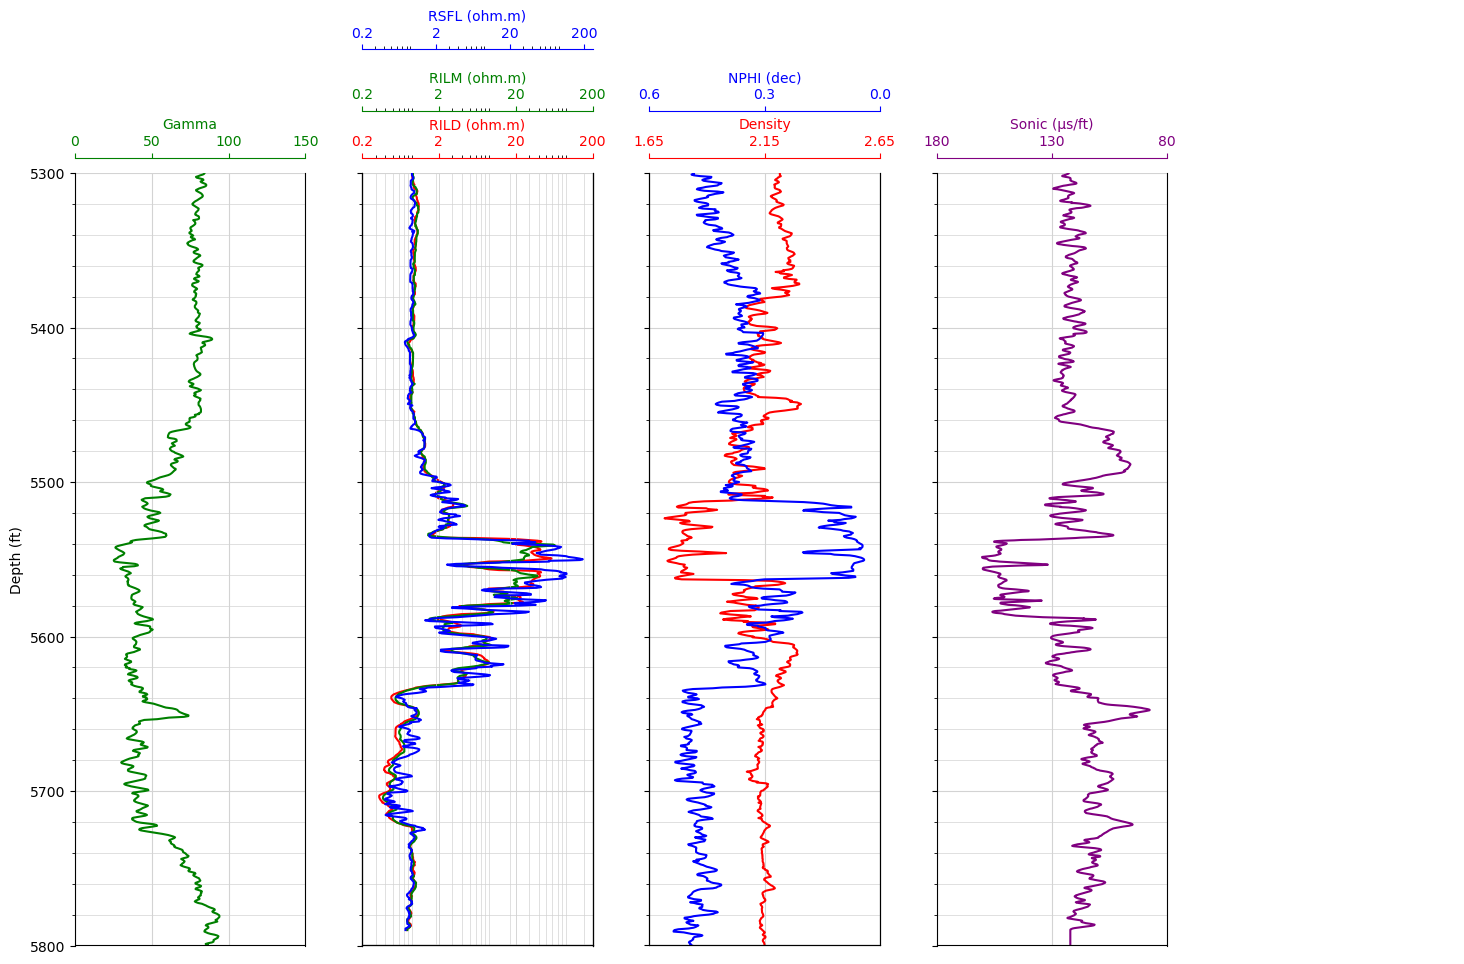

In [105]:
import matplotlib.pyplot as plt

# Assuming df2 is already defined and contains the necessary data
fig, ax = plt.subplots(figsize=(15, 10), sharey=True)
fig.patch.set_visible(False)
plt.axis('off')

# Set up the plot axes
ax1 = plt.subplot2grid((1, 5), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 5), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 5), (0, 2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 5), (0, 3), rowspan=1, colspan=1)
ax5 = ax3.twiny()  # Twins the y-axis for the density track with the neutron track

# Set common y-limits for all subplots
common_ylim = (5300, 5800)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data=df2, color="green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (ft)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150])
ax1.set_ylim(common_ylim)

# Resistivity track
ax2.plot("RILD", "DEPTH", data=df2, color="red")  # Deep resistivity
ax2.set_xlabel("RILD (ohm.m)")
ax2.set_xlim(0.2, 200)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.semilogx()
ax2.set_ylim(common_ylim)
ax2.grid(which='both', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

ax2_twiny1 = ax2.twiny()
ax2_twiny1.plot("RILM", "DEPTH", data=df2, color="green")  # Medium resistivity
ax2_twiny1.set_xlabel("RILM (ohm.m)")
ax2_twiny1.xaxis.label.set_color("green")
ax2_twiny1.tick_params(axis='x', colors="green")
ax2_twiny1.spines["top"].set_position(("axes", 1.08))
ax2_twiny1.spines["top"].set_edgecolor("green")
ax2_twiny1.semilogx()
ax2_twiny1.set_ylim(common_ylim)

ax2_twiny2 = ax2.twiny()
ax2_twiny2.plot("RSFL", "DEPTH", data=df2, color="blue")  # Spherical resistivity
ax2_twiny2.set_xlabel("RSFL (ohm.m)")
ax2_twiny2.xaxis.label.set_color("blue")
ax2_twiny2.tick_params(axis='x', colors="blue")
ax2_twiny2.spines["top"].set_position(("axes", 1.16))
ax2_twiny2.spines["top"].set_edgecolor("blue")
ax2_twiny2.semilogx()
ax2_twiny2.set_ylim(common_ylim)

# Density track
ax3.plot("RHOB", "DEPTH", data=df2, color="red")
ax3.set_xlabel("Density")
ax3.set_xlim(1.65, 2.65)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.65, 2.15, 2.65])
ax3.set_ylim(common_ylim)

# Sonic track
ax4.plot("DT", "DEPTH", data=df2, color="purple")
ax4.set_xlabel("Sonic (µs/ft)")
ax4.set_xlim(180, 80)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")
ax4.set_ylim(common_ylim)
ax4.set_xticks([180,130,80])
ax4.set_xticklabels([180,130,80])  # Ensure labels match the ticks

# Neutron track placed on top of density track
ax5.plot("NPHI_SS", "DEPTH", data=df2, color="blue")
ax5.set_xlabel('NPHI (dec)')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.6, 0)
ax5.set_ylim(common_ylim)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.6, 0.3, 0])

# Remove y-axis tick labels for all axes except ax1
for ax in [ax2, ax3, ax4]:
    ax.set_yticklabels([])

# Common functions for setting up the plot
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))


# List of all resistivity-related axes
resistivity_axes = [ax2, ax2_twiny1, ax2_twiny2]

# Set specific x-ticks and add gridlines for all resistivity-related axes
for ax in resistivity_axes:
    ax.set_xticks([0.2, 2, 20, 200])
    ax.set_xticklabels([0.2, 2, 20, 200])  # Ensure labels match the ticks
    ax.grid(which='major', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

# List of all axes including twinned axes
all_axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax2_twiny1, ax2_twiny2]

# Invert the y-axis for all axes
for ax in all_axes:
    ax.yaxis.set_minor_locator(MultipleLocator(20))
    ax.grid(which='minor', axis='y', color='lightgrey', linestyle='-', linewidth=0.5)
    ax.tick_params(axis='y', which='minor', labelleft=False)  # Hide minor tick labels 
    ax.invert_yaxis()



# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

### 2. Calculate and plot a formation temperature log using the data provided in the well-log header for surface and bottom-hole temperature. Assume a local linear geothermal gradient.

In [8]:
# From the well header, 140 F and the BH depth is 7181 ft. Assuming the mud 
# properties were measured at surface temperature of 78 F and 100 ft elevation, 
# the temperature gradient is

TGrad = (140-78)/(7181-100) #F/ft
TGrad


0.008755825448382997

In [9]:
df2.head()

,DEPTH,SP,RWA,RSFL,RILM,RILD,DT,GR,CALI,DPHI,NPHI_SS,RHOB
0,5300.00,-0.251479,0.207594,0.944588,0.902729,0.902729,122.6844,84.419291,1.421834,30.295712,0.488664,2.150121
1,5300.25,-0.251479,0.213018,0.944588,0.910987,0.902729,122.6844,84.271654,1.421834,30.325283,0.490882,2.149633
2,5300.50,-0.251479,0.218442,0.944588,0.919246,0.902729,122.9794,84.124016,1.421834,30.354855,0.493100,2.149145
3,5300.75,-0.247546,0.221048,0.943543,0.918322,0.901765,123.4710,83.682239,1.420858,30.354855,0.492731,2.149145
4,5301.00,-0.243612,0.223654,0.942498,0.917398,0.900802,123.7752,83.240463,1.419882,30.354855,0.492363,2.149145


In [10]:
# We can then estimate the wellbore temperature for the depths of interest, 
# by adding a new column with this calculation
df2['Temp']=78+TGrad*df2['DEPTH'] # Temperature calculation
df2[['DEPTH','Temp']]

,DEPTH,Temp
0,5300.00,124.405875
1,5300.25,124.408064
2,5300.50,124.410253
3,5300.75,124.412442
4,5301.00,124.414631
...,...,...
1996,5799.00,128.775032
1997,5799.25,128.777221
1998,5799.50,128.779410
1999,5799.75,128.781599


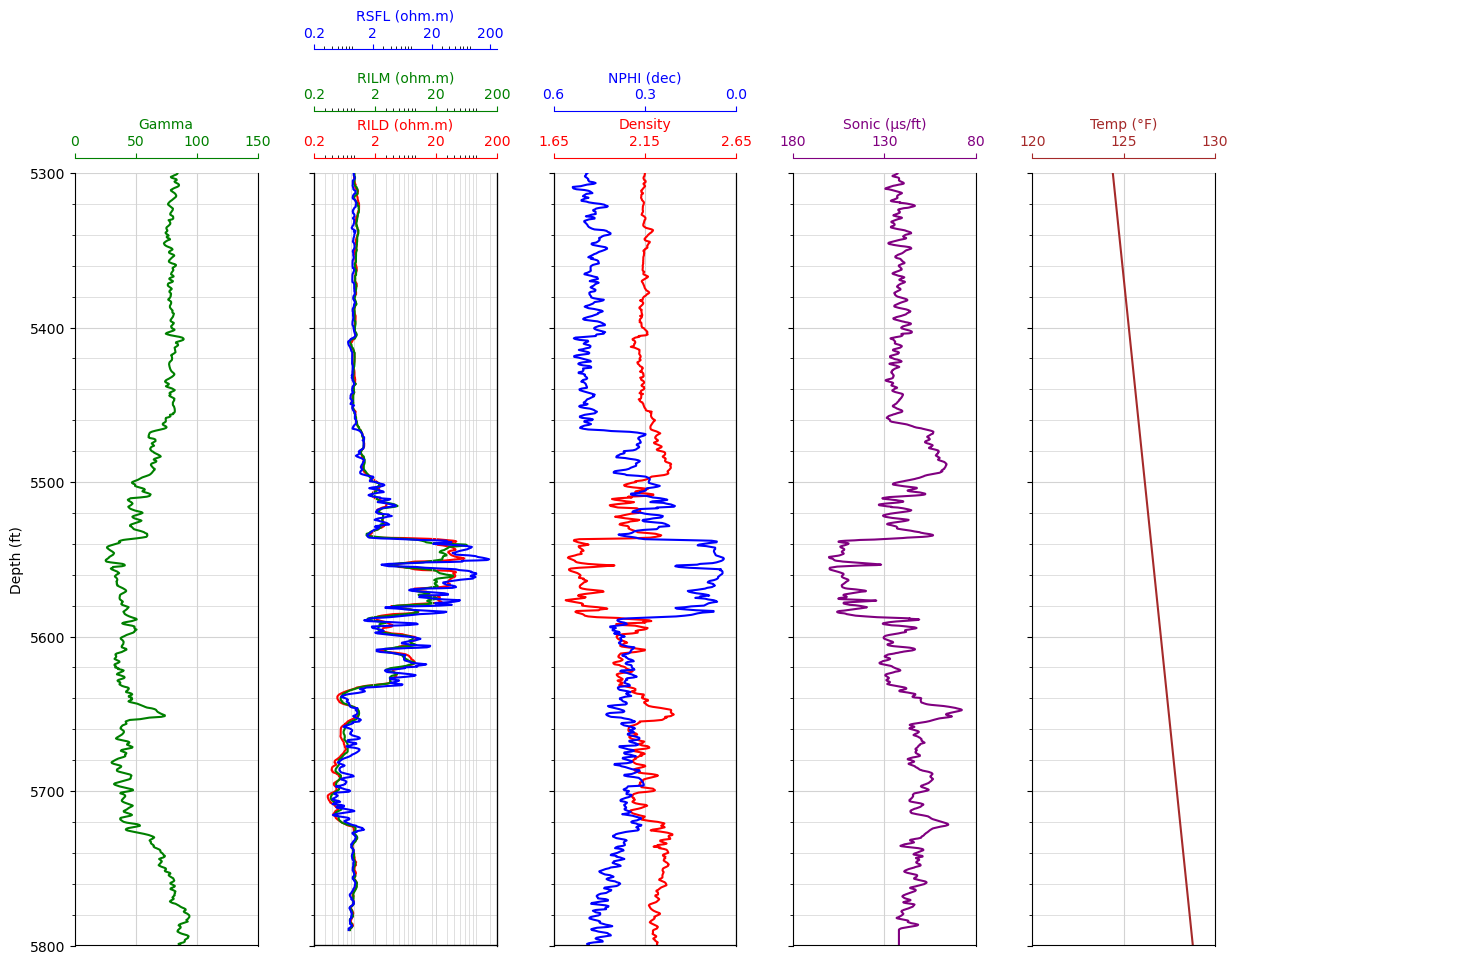

In [245]:
# Now, we plot
import matplotlib.pyplot as plt

# Assuming df2 is already defined and contains the necessary data
fig, ax = plt.subplots(figsize=(15, 10), sharey=True)
fig.patch.set_visible(False)
plt.axis('off')

# Set up the plot axes
ax1 = plt.subplot2grid((1, 6), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 6), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 6), (0, 2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 6), (0, 3), rowspan=1, colspan=1)
ax5 = ax3.twiny()  # Twins the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1, 6), (0, 4), rowspan=1, colspan=1)  # New subplot for Temp

# Set common y-limits for all subplots
common_ylim = (5300, 5800)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data=df2, color="green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (ft)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150])
ax1.set_ylim(common_ylim)
#ax3.invert_yaxis()


# Resistivity track
ax2.plot("RILD", "DEPTH", data=df2, color="red")  # Deep resistivity
ax2.set_xlabel("RILD (ohm.m)")
ax2.set_xlim(0.2, 200)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.semilogx()
ax2.set_ylim(common_ylim)
ax2.grid(which='both', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

ax2_twiny1 = ax2.twiny()
ax2_twiny1.plot("RILM", "DEPTH", data=df2, color="green")  # Medium resistivity
ax2_twiny1.set_xlabel("RILM (ohm.m)")
ax2_twiny1.xaxis.label.set_color("green")
ax2_twiny1.tick_params(axis='x', colors="green")
ax2_twiny1.spines["top"].set_position(("axes", 1.08))
ax2_twiny1.spines["top"].set_edgecolor("green")
ax2_twiny1.semilogx()
ax2_twiny1.set_ylim(common_ylim)

ax2_twiny2 = ax2.twiny()
ax2_twiny2.plot("RSFL", "DEPTH", data=df2, color="blue")  # Spherical resistivity
ax2_twiny2.set_xlabel("RSFL (ohm.m)")
ax2_twiny2.xaxis.label.set_color("blue")
ax2_twiny2.tick_params(axis='x', colors="blue")
ax2_twiny2.spines["top"].set_position(("axes", 1.16))
ax2_twiny2.spines["top"].set_edgecolor("blue")
ax2_twiny2.semilogx()
ax2_twiny2.set_ylim(common_ylim)

# Density track
ax3.plot("RHOB", "DEPTH", data=df2, color="red")
ax3.set_xlabel("Density")
ax3.set_xlim(1.65, 2.65)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.65, 2.15, 2.65])
ax3.set_ylim(common_ylim)
ax3.invert_yaxis()


# Sonic track
ax4.plot("DT", "DEPTH", data=df2, color="purple")
ax4.set_xlabel("Sonic (µs/ft)")
ax4.set_xlim(180, 80)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")
ax4.set_ylim(common_ylim)
ax4.set_xticks([180,130,80])
ax4.set_xticklabels([180,130,80])  # Ensure labels match the ticks
#ax4.invert_yaxis()


# Neutron track placed on top of density track
ax5.plot("NPHI_SS", "DEPTH", data=df2, color="blue")
ax5.set_xlabel('NPHI (dec)')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.6, 0)
ax5.set_ylim(common_ylim)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.6, 0.3, 0])
ax5.invert_yaxis()

# Temperature track
ax6.plot("Temp", "DEPTH", data=df2, color="brown")
ax6.set_xlabel("Temp (°F)")
ax6.xaxis.label.set_color("brown")
ax6.set_xlim(df2["Temp"].min(), df2["Temp"].max())  # Set x-limits based on data
ax6.tick_params(axis='x', colors="brown")
ax6.spines["top"].set_edgecolor("brown")
ax6.set_ylim(common_ylim)
ax6.set_xticks([120,125,130])


# Remove y-axis tick labels for all axes except ax1
for ax in [ax2, ax3, ax4, ax6]:
    ax.set_yticklabels([])

# Common functions for setting up the plot
for ax in [ax1, ax2, ax3, ax4, ax6]:
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
 
# List of all resistivity-related axes
resistivity_axes = [ax2, ax2_twiny1, ax2_twiny2]

# Set specific x-ticks and add gridlines for all resistivity-related axes
for ax in resistivity_axes:
    ax.set_xticks([0.2, 2, 20, 200])
    ax.set_xticklabels([0.2, 2, 20, 200])  # Ensure labels match the ticks
    ax.grid(which='major', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

# List of all axes including twinned axes
all_axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax2_twiny1, ax2_twiny2]

# Invert the y-axis for all axes
for ax in all_axes:
    ax.yaxis.set_minor_locator(MultipleLocator(20))
    ax.grid(which='minor', axis='y', color='lightgrey', linestyle='-', linewidth=0.5)
    ax.tick_params(axis='y', which='minor', labelleft=False)  # Hide minor tick labels  
    ax.invert_yaxis()
 

from matplotlib.ticker import MultipleLocator


# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

### 3. Calculate the apparent density porosity log from the density log assuming a fluid density equal to 1 gm/cc and a quartz matrix density (2.65 gm/cc).

In [29]:
rhoma = 2.65 # matrix density in g/cc
rhof = 1 # fluid density in g/cc
df2['Phi_den_ss'] = (rhoma - df2['RHOB'])/(rhoma-rhof)
df2[['Phi_den_ss']].head()


,Phi_den_ss
0,0.302957
1,0.303253
2,0.303549
3,0.303549
4,0.303549


In [39]:
# Checking out the statistics to QC
df2[['Phi_den_ss']].describe()

,Phi_den_ss
count,2001.000000
mean,0.324449
std,0.075284
min,0.207442
25%,0.279573
50%,0.309759
75%,0.341104
max,0.565882


### 4. Calculate and plot the so-called apparent water resistivity log, where apparent water resistivity is given by (from Archie’s equation assuming Sw = 1) porosity (from item 3). The latter calculated log is often used as rough indicator of presence of hydrocarbon in sandstones. Does it perform well in this example?

In [56]:
# Archie's parameters
a = 1
m = 2.05
n = 1.95

df2['Rwapp'] = df2['RILD']*df2['Phi_den_ss']**m/a

In [60]:
df2[['Rwapp']].describe()


,Rwapp
count,1961.000000
mean,0.758626
std,2.200089
min,0.031419
25%,0.057446
50%,0.082876
75%,0.202266
max,17.334407


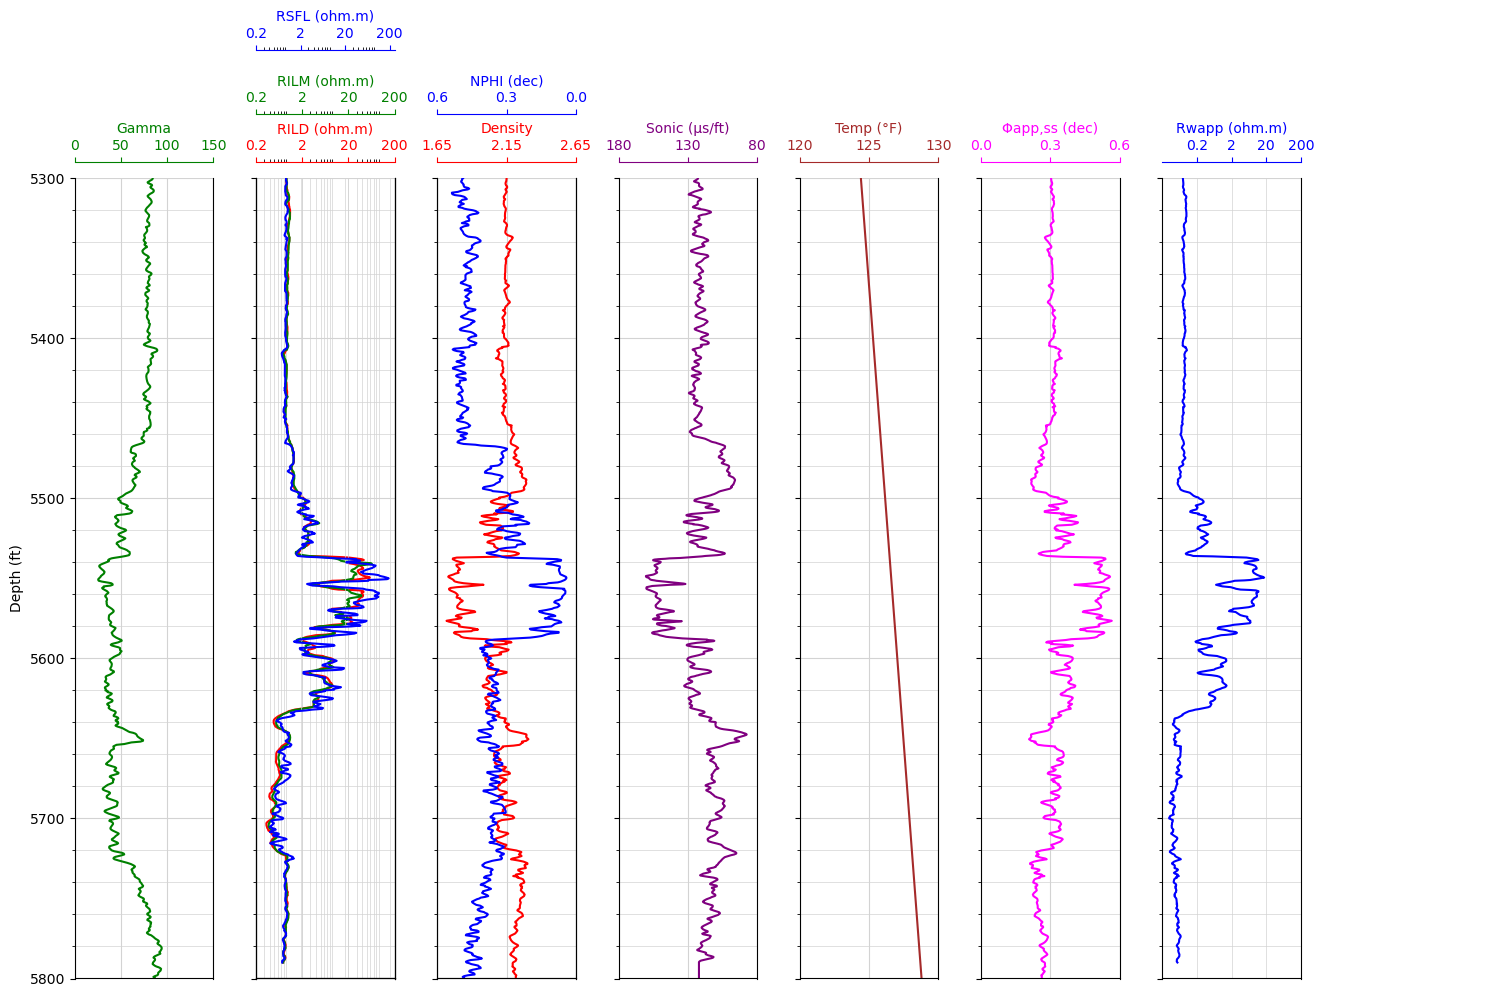

In [116]:
# Now, we plot
import matplotlib.pyplot as plt

# Assuming df2 is already defined and contains the necessary data
fig, ax = plt.subplots(figsize=(15, 10), sharey=True)
fig.patch.set_visible(False)
plt.axis('off')

# Set up the plot axes
ax1 = plt.subplot2grid((1, 8), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 8), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 8), (0, 2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 8), (0, 3), rowspan=1, colspan=1)
ax5 = ax3.twiny()  # Twins the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1, 8), (0, 4), rowspan=1, colspan=1)  # New subplot for Temp
ax7 = plt.subplot2grid((1, 8), (0, 5), rowspan=1, colspan=1)  # New subplot for Porosity
ax8 = plt.subplot2grid((1, 8), (0, 6), rowspan=1, colspan=1)  # New subplot for Rwapp

# Set common y-limits for all subplots
common_ylim = (5300, 5800)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data=df2, color="green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (ft)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150])
ax1.set_ylim(common_ylim)

# Resistivity track
ax2.plot("RILD", "DEPTH", data=df2, color="red")  # Deep resistivity
ax2.set_xlabel("RILD (ohm.m)")
ax2.set_xlim(0.2, 200)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.semilogx()
ax2.set_ylim(common_ylim)
ax2.grid(which='both', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

ax2_twiny1 = ax2.twiny()
ax2_twiny1.plot("RILM", "DEPTH", data=df2, color="green")  # Medium resistivity
ax2_twiny1.set_xlabel("RILM (ohm.m)")
ax2_twiny1.xaxis.label.set_color("green")
ax2_twiny1.tick_params(axis='x', colors="green")
ax2_twiny1.spines["top"].set_position(("axes", 1.08))
ax2_twiny1.spines["top"].set_edgecolor("green")
ax2_twiny1.semilogx()
ax2_twiny1.set_ylim(common_ylim)

ax2_twiny2 = ax2.twiny()
ax2_twiny2.plot("RSFL", "DEPTH", data=df2, color="blue")  # Spherical resistivity
ax2_twiny2.set_xlabel("RSFL (ohm.m)")
ax2_twiny2.xaxis.label.set_color("blue")
ax2_twiny2.tick_params(axis='x', colors="blue")
ax2_twiny2.spines["top"].set_position(("axes", 1.16))
ax2_twiny2.spines["top"].set_edgecolor("blue")
ax2_twiny2.semilogx()
ax2_twiny2.set_ylim(common_ylim)

# Density track
ax3.plot("RHOB", "DEPTH", data=df2, color="red")
ax3.set_xlabel("Density")
ax3.set_xlim(1.65, 2.65)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.65, 2.15, 2.65])
ax3.set_ylim(common_ylim)
ax3.invert_yaxis()

# Sonic track
ax4.plot("DT", "DEPTH", data=df2, color="purple")
ax4.set_xlabel("Sonic (µs/ft)")
ax4.set_xlim(180, 80)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")
ax4.set_ylim(common_ylim)
ax4.set_xticks([180,130,80])
ax4.set_xticklabels([180,130,80])  # Ensure labels match the ticks

# Neutron track placed on top of density track
ax5.plot("NPHI_SS", "DEPTH", data=df2, color="blue")
ax5.set_xlabel('NPHI (dec)')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.6, 0)
ax5.set_ylim(common_ylim)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.6, 0.3, 0])
ax5.invert_yaxis()

# Temperature track
ax6.plot("Temp", "DEPTH", data=df2, color="brown")
ax6.set_xlabel("Temp (°F)")
ax6.xaxis.label.set_color("brown")
ax6.set_xlim(df2["Temp"].min(), df2["Temp"].max())  # Set x-limits based on data
ax6.tick_params(axis='x', colors="brown")
ax6.spines["top"].set_edgecolor("brown")
ax6.set_ylim(common_ylim)
ax6.set_xticks([120,125,130])


# Porosity
ax7.plot("Phi_den_ss", "DEPTH", data=df2, color="magenta")
ax7.set_xlabel("Φapp,ss (dec)")
ax7.xaxis.label.set_color("magenta")
ax7.set_xlim(df2["Phi_den_ss"].min(), df2["Phi_den_ss"].max())  # Set x-limits based on data
ax7.tick_params(axis='x', colors="magenta")
ax7.spines["top"].set_edgecolor("magenta")
ax7.set_ylim(common_ylim)
ax7.set_xticks([0, .3, 0.6])

# Water Resistivity
ax8.plot("Rwapp", "DEPTH", data=df2, color="blue")
ax8.set_xlabel("Rwapp (ohm.m)")
ax8.xaxis.label.set_color("blue")
ax8.set_xlim(df2["Rwapp"].min(), df2["Rwapp"].max())  # Set x-limits based on data
ax8.tick_params(axis='x', colors="blue")
ax8.spines["top"].set_edgecolor("blue")
ax8.set_ylim(common_ylim)
ax8.set_xticks([0.02,200])
ax8.spines["top"].set_edgecolor("blue")
ax8.semilogx()
ax8.set_ylim(common_ylim)
#ax8.grid(which='both', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

# Remove y-axis tick labels for all axes except ax1
for ax in [ax2, ax3, ax4, ax6, ax7, ax8]:
    ax.set_yticklabels([])

# More æsthetics
for ax in [ax1, ax2, ax3, ax4, ax6, ax7, ax8]:
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
 
# List of all resistivity-related axes
resistivity_axes = [ax2, ax2_twiny1, ax2_twiny2, ax8]


# Set specific x-ticks and add gridlines for all resistivity-related axes
for ax in resistivity_axes:
    ax.set_xticks([0.2, 2, 20, 200])
    ax.set_xticklabels([0.2, 2, 20, 200])  # Ensure labels match the ticks
    ax.grid(which='major', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

# List of all axes including twinned axes
all_axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax2_twiny1, ax2_twiny2, ax7, ax8]

# Invert the y-axis for all axes
for ax in all_axes:
    ax.yaxis.set_minor_locator(MultipleLocator(20))
    ax.grid(which='minor', axis='y', color='lightgrey', linestyle='-', linewidth=0.5)
    ax.tick_params(axis='y', which='minor', labelleft=False)  # Hide minor tick labels 
    ax.invert_yaxis()
  



# Adjust layout
plt.tight_layout(pad=1.0)
plt.show()

#### It does have a notorious change in the hydrocarbon-rich section, which is the upper part of the clean sandstone interval at approximately 5540 ft of depth.

### 5. Identify the aquifer depth interval and consider only depths in that interval where the gamma-ray log exhibits a local minimum. Verify the that apparent density and neutron porosity log are approximately equal at those locations and calculate and plot the corresponding rock porosity.

In [92]:
# Aquifers have two conditions: Local GR minima and Neutron-Density Porosity Overlap
# We first estimate the difference between Neutron porosity and the calculated apparent density porosity
df2['diff_phi']=df2['NPHI_SS']-df2['Phi_den_ss']
df2[['diff_phi']].describe()


,diff_phi
count,2001.000000
mean,0.049908
std,0.178780
min,-0.515131
25%,0.000628
50%,0.125826
75%,0.169243
max,0.232430


In [ ]:
# Aquifers have two conditions: Local GR minima and Neutron-Density Porosity Overlap


filtered_df = df2[df2['GR'] < 40]


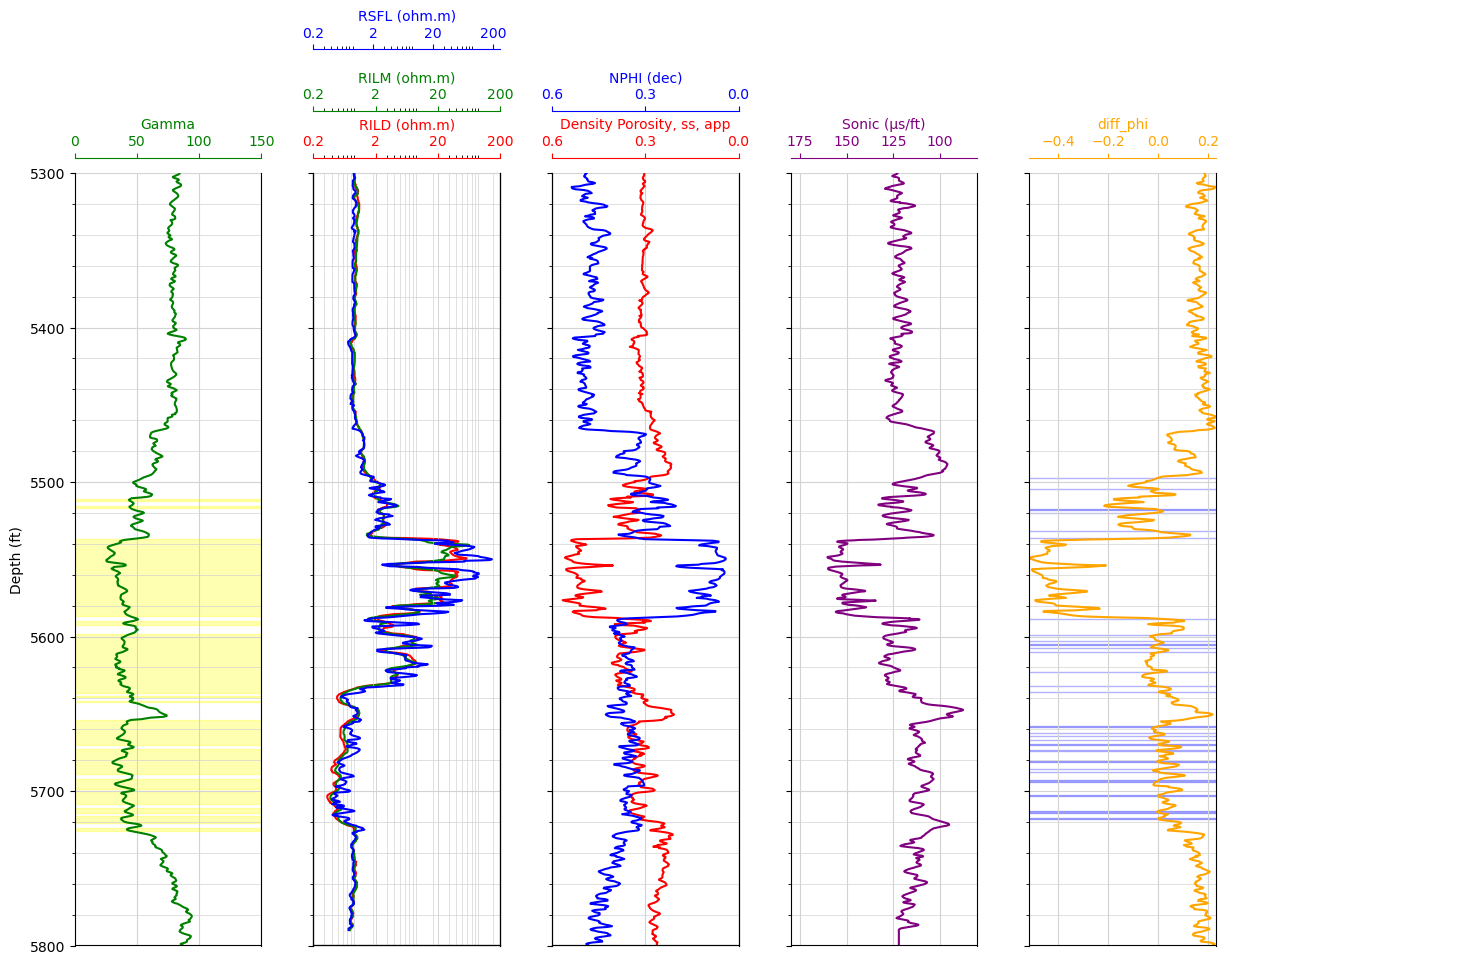

In [127]:
import matplotlib.pyplot as plt

# Assuming df2 is already defined and contains the necessary data
fig, ax = plt.subplots(figsize=(15, 10), sharey=True)
fig.patch.set_visible(False)
plt.axis('off')

# Set up the plot axes
ax1 = plt.subplot2grid((1, 6), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 6), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 6), (0, 2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 6), (0, 3), rowspan=1, colspan=1)
ax5 = ax3.twiny()  # Twins the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1, 6), (0, 4), rowspan=1, colspan=1)  # New subplot for Temp

# Set common y-limits for all subplots
common_ylim = (5300, 5800)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data=df2, color="green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (ft)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150])
ax1.set_ylim(common_ylim)

# Shade areas where GR < 40
ax1.fill_betweenx(df2["DEPTH"], 0, 150, where=(df2["GR"] < 45), color='yellow', alpha=0.3)

# Resistivity track
ax2.plot("RILD", "DEPTH", data=df2, color="red")  # Deep resistivity
ax2.set_xlabel("RILD (ohm.m)")
ax2.set_xlim(0.2, 200)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.semilogx()
ax2.set_ylim(common_ylim)
ax2.grid(which='both', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

ax2_twiny1 = ax2.twiny()
ax2_twiny1.plot("RILM", "DEPTH", data=df2, color="green")  # Medium resistivity
ax2_twiny1.set_xlabel("RILM (ohm.m)")
ax2_twiny1.xaxis.label.set_color("green")
ax2_twiny1.tick_params(axis='x', colors="green")
ax2_twiny1.spines["top"].set_position(("axes", 1.08))
ax2_twiny1.spines["top"].set_edgecolor("green")
ax2_twiny1.semilogx()
ax2_twiny1.set_ylim(common_ylim)

ax2_twiny2 = ax2.twiny()
ax2_twiny2.plot("RSFL", "DEPTH", data=df2, color="blue")  # Spherical resistivity
ax2_twiny2.set_xlabel("RSFL (ohm.m)")
ax2_twiny2.xaxis.label.set_color("blue")
ax2_twiny2.tick_params(axis='x', colors="blue")
ax2_twiny2.spines["top"].set_position(("axes", 1.16))
ax2_twiny2.spines["top"].set_edgecolor("blue")
ax2_twiny2.semilogx()
ax2_twiny2.set_ylim(common_ylim)

# Density Porosity track
ax3.plot("Phi_den_ss", "DEPTH", data=df2, color="red")
ax3.set_xlabel("Density Porosity, ss, app")
ax3.set_xlim(.6, 0)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([.6,.3,0])
ax3.set_ylim(common_ylim)
ax3.invert_yaxis()

# Sonic track
ax4.plot("DT", "DEPTH", data=df2, color="purple")
ax4.set_xlabel("Sonic (µs/ft)")
ax4.set_xlim(180, 80)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")
ax4.set_ylim(common_ylim)

# Neutron track placed on top of density track
ax5.plot("NPHI_SS", "DEPTH", data=df2, color="blue")
ax5.set_xlabel('NPHI (dec)')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.6, 0)
ax5.set_ylim(common_ylim)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.6, 0.3, 0])
ax5.invert_yaxis()

# Apparent density vs Neutron Porosity (ss) track
ax6.plot("diff_phi", "DEPTH", data=df2, color="orange")
ax6.set_xlabel("diff_phi")
ax6.xaxis.label.set_color("orange")
ax6.set_xlim(df2["diff_phi"].min(), df2["diff_phi"].max())  # Set x-limits based on data
ax6.tick_params(axis='x', colors="orange")
ax6.spines["top"].set_edgecolor("orange")
ax6.set_ylim(common_ylim)
ax6.fill_betweenx(df2["DEPTH"], df2["diff_phi"].min(), df2["diff_phi"].max(),
                  where=(df2["diff_phi"].abs() < 0.005), color='blue', alpha=0.3)

# Remove y-axis tick labels for all axes except ax1
for ax in [ax2, ax3, ax4, ax6]:
    ax.set_yticklabels([])

# Common functions for setting up the plot
for ax in [ax1, ax2, ax3, ax4, ax6]:
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    

# List of all resistivity-related axes
resistivity_axes = [ax2, ax2_twiny1, ax2_twiny2]

# Set specific x-ticks and add gridlines for all resistivity-related axes
for ax in resistivity_axes:
    ax.set_xticks([0.2, 2, 20, 200])
    ax.set_xticklabels([0.2, 2, 20, 200])  # Ensure labels match the ticks
    ax.grid(which='major', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

# List of all axes including twinned axes
all_axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax2_twiny1, ax2_twiny2, ax7, ax8]

# Invert the y-axis for all axes
for ax in all_axes:
    ax.yaxis.set_minor_locator(MultipleLocator(20))
    ax.grid(which='minor', axis='y', color='lightgrey', linestyle='-', linewidth=0.5)
    ax.tick_params(axis='y', which='minor', labelleft=False)  # Hide minor tick labels 
    ax.invert_yaxis()

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

Where blue shading (Difference between NPHI_SS and Phi_den_ss) overlap, there is an aquifer

In [133]:
# Filter the DataFrame to include rows where 'GR' is less than 40 and 'abs(diff_phi)' is less than or equal to 0.001
filtered_df = df2[(df2['GR'] < 40) & (df2['diff_phi'].abs() <= 0.01)]
filtered_df.describe()

,DEPTH,SP,RWA,RSFL,RILM,RILD,DT,GR,CALI,DPHI,NPHI_SS,RHOB,Temp,Phi_den_ss,Rwapp,diff_phi
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5661.265000,-49.990678,0.326538,2.618660,2.145338,2.138866,114.707388,37.137130,1.149630,34.415275,0.343490,2.082148,127.569048,0.344153,0.274505,-0.000663
std,37.593774,7.585090,0.403833,3.331331,2.874822,2.895653,8.470101,2.579824,0.004660,2.222618,0.021486,0.036673,0.329165,0.022226,0.397226,0.005598
min,5591.500000,-60.157748,0.045168,0.503061,0.449132,0.386652,102.723700,30.166308,1.138861,30.857565,0.307836,2.015209,126.958198,0.308576,0.038540,-0.009906
25%,5624.937500,-56.281569,0.056276,0.596266,0.505267,0.444725,107.763800,36.497178,1.148606,32.591178,0.327206,2.059145,127.250971,0.325912,0.043458,-0.005545
50%,5673.625000,-51.745459,0.089249,0.795157,0.632486,0.545825,113.539800,37.541285,1.149704,34.320048,0.344196,2.083719,127.677270,0.343200,0.060987,0.000073
75%,5687.000000,-42.288240,0.842515,3.388152,2.990897,3.475680,122.119025,38.943140,1.151168,35.809418,0.355730,2.112246,127.794379,0.358094,0.418192,0.004142
max,5718.500000,-31.718704,1.006410,11.157956,9.488796,9.114086,130.747300,39.855862,1.158488,38.472154,0.381321,2.140850,128.070188,0.384722,1.286067,0.009140


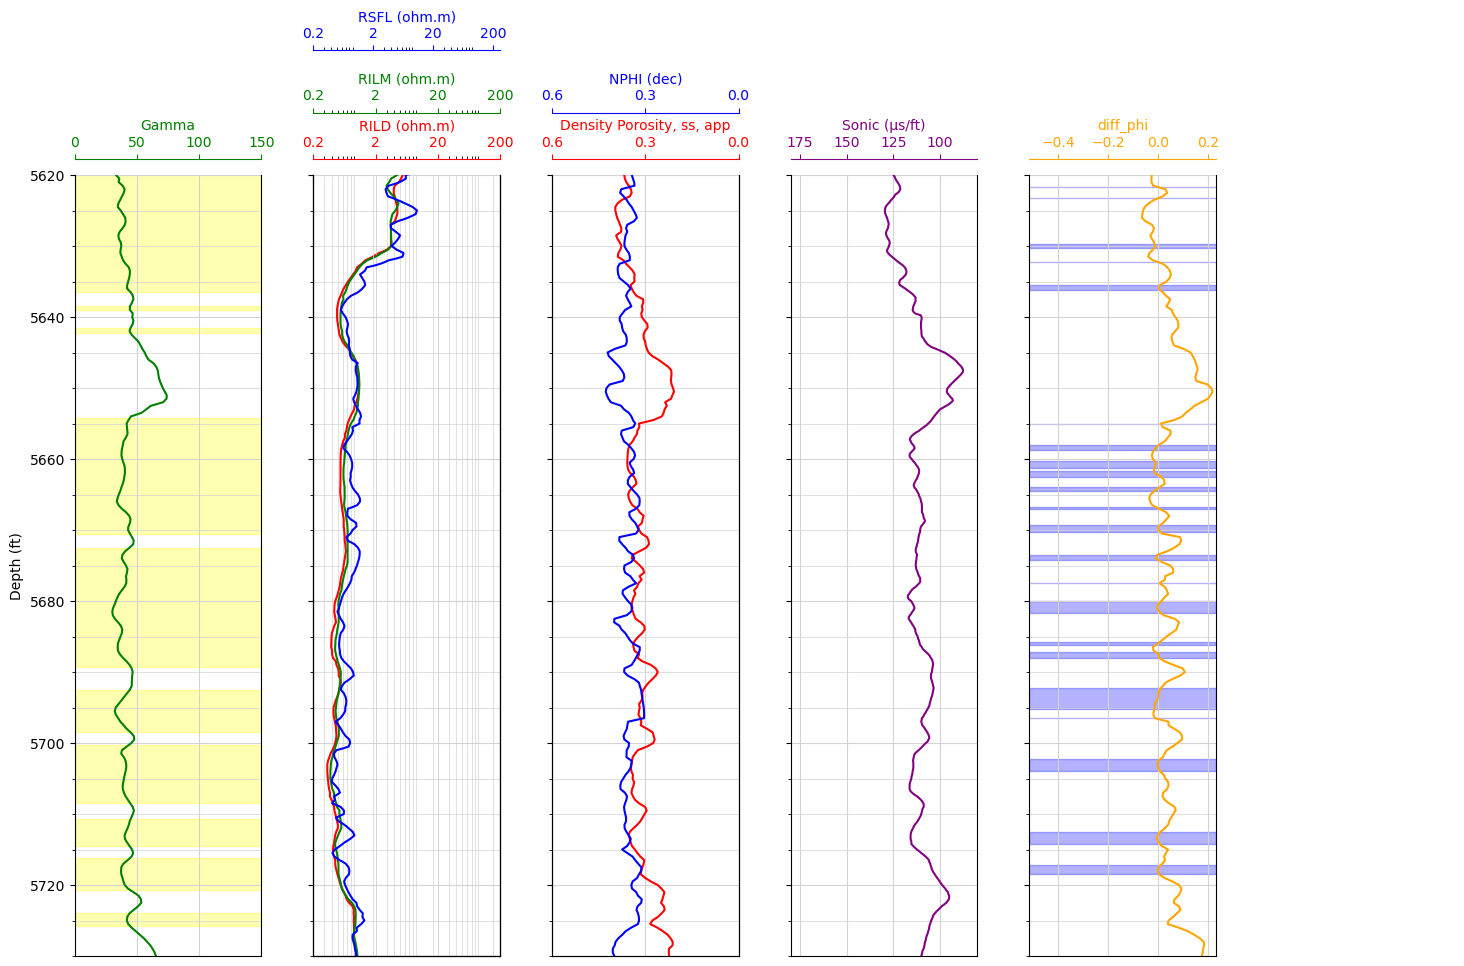

In [164]:
import matplotlib.pyplot as plt

# Assuming df2 is already defined and contains the necessary data
fig, ax = plt.subplots(figsize=(15, 10), sharey=True)
fig.patch.set_visible(False)
plt.axis('off')

# Set up the plot axes
ax1 = plt.subplot2grid((1, 6), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 6), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 6), (0, 2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 6), (0, 3), rowspan=1, colspan=1)
ax5 = ax3.twiny()  # Twins the y-axis for the density track with the neutron track
ax6 = plt.subplot2grid((1, 6), (0, 4), rowspan=1, colspan=1)  # New subplot for Temp

# Set common y-limits for all subplots
common_ylim = (5620, 5730)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data=df2, color="green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (ft)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150])
ax1.set_ylim(common_ylim)

# Shade areas where GR < 40
ax1.fill_betweenx(df2["DEPTH"], 0, 150, where=(df2["GR"] < 45), color='yellow', alpha=0.3)

# Resistivity track
ax2.plot("RILD", "DEPTH", data=df2, color="red")  # Deep resistivity
ax2.set_xlabel("RILD (ohm.m)")
ax2.set_xlim(0.2, 200)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.semilogx()
ax2.set_ylim(common_ylim)
ax2.grid(which='both', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

ax2_twiny1 = ax2.twiny()
ax2_twiny1.plot("RILM", "DEPTH", data=df2, color="green")  # Medium resistivity
ax2_twiny1.set_xlabel("RILM (ohm.m)")
ax2_twiny1.xaxis.label.set_color("green")
ax2_twiny1.tick_params(axis='x', colors="green")
ax2_twiny1.spines["top"].set_position(("axes", 1.08))
ax2_twiny1.spines["top"].set_edgecolor("green")
ax2_twiny1.semilogx()
ax2_twiny1.set_ylim(common_ylim)

ax2_twiny2 = ax2.twiny()
ax2_twiny2.plot("RSFL", "DEPTH", data=df2, color="blue")  # Spherical resistivity
ax2_twiny2.set_xlabel("RSFL (ohm.m)")
ax2_twiny2.xaxis.label.set_color("blue")
ax2_twiny2.tick_params(axis='x', colors="blue")
ax2_twiny2.spines["top"].set_position(("axes", 1.16))
ax2_twiny2.spines["top"].set_edgecolor("blue")
ax2_twiny2.semilogx()
ax2_twiny2.set_ylim(common_ylim)

# Density Porosity track
ax3.plot("Phi_den_ss", "DEPTH", data=df2, color="red")
ax3.set_xlabel("Density Porosity, ss, app")
ax3.set_xlim(.6, 0)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([.6,.3,0])
ax3.set_ylim(common_ylim)
ax3.invert_yaxis()

# Sonic track
ax4.plot("DT", "DEPTH", data=df2, color="purple")
ax4.set_xlabel("Sonic (µs/ft)")
ax4.set_xlim(180, 80)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")
ax4.set_ylim(common_ylim)

# Neutron track placed on top of density track
ax5.plot("NPHI_SS", "DEPTH", data=df2, color="blue")
ax5.set_xlabel('NPHI (dec)')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.6, 0)
ax5.set_ylim(common_ylim)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.6, 0.3, 0])
ax5.invert_yaxis()

# Apparent density vs Neutron Porosity (ss) track
ax6.plot("diff_phi", "DEPTH", data=df2, color="orange")
ax6.set_xlabel("diff_phi")
ax6.xaxis.label.set_color("orange")
ax6.set_xlim(df2["diff_phi"].min(), df2["diff_phi"].max())  # Set x-limits based on data
ax6.tick_params(axis='x', colors="orange")
ax6.spines["top"].set_edgecolor("orange")
ax6.set_ylim(common_ylim)
ax6.fill_betweenx(df2["DEPTH"], df2["diff_phi"].min(), df2["diff_phi"].max(),
                  where=(df2["diff_phi"].abs() < 0.015), color='blue', alpha=0.3)

# Remove y-axis tick labels for all axes except ax1
for ax in [ax2, ax3, ax4, ax6]:
    ax.set_yticklabels([])

# Common functions for setting up the plot
for ax in [ax1, ax2, ax3, ax4, ax6]:
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    

# List of all resistivity-related axes
resistivity_axes = [ax2, ax2_twiny1, ax2_twiny2]

# Set specific x-ticks and add gridlines for all resistivity-related axes
for ax in resistivity_axes:
    ax.set_xticks([0.2, 2, 20, 200])
    ax.set_xticklabels([0.2, 2, 20, 200])  # Ensure labels match the ticks
    ax.grid(which='major', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

# List of all axes including twinned axes
all_axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax2_twiny1, ax2_twiny2, ax7, ax8]

# Invert the y-axis for all axes
for ax in all_axes:
    ax.yaxis.set_minor_locator(MultipleLocator(5)) # y axis gridline spacing decreased to 5 ft
    ax.grid(which='minor', axis='y', color='lightgrey', linestyle='-', linewidth=0.5)
    ax.tick_params(axis='y', which='minor', labelleft=False)  # Hide minor tick labels 
    ax.invert_yaxis()

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()

It looks like the aquifer is more likely to be between

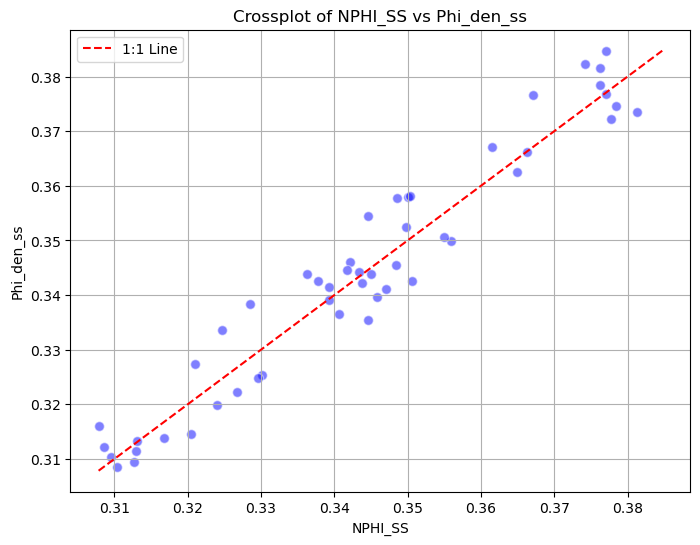

In [ ]:

# filtered_df is already defined and contains the necessary filtered data for GR and Diff_Phi minima
plt.figure(figsize=(8, 6))

# Create a scatter plot for the crossplot
plt.scatter(filtered_df['NPHI_SS'], filtered_df['Phi_den_ss'], alpha=0.5, c='blue', edgecolors='w', s=50)

# Add a 1-to-1 line
min_val = min(filtered_df['NPHI_SS'].min(), filtered_df['Phi_den_ss'].min())
max_val = max(filtered_df['NPHI_SS'].max(), filtered_df['Phi_den_ss'].max())
plt.plot([min_val, max_val], [min_val, max_val], ls='--', c='red', label='1:1 Line')

# Set labels and title
plt.xlabel('NPHI_SS')
plt.ylabel('Phi_den_ss')
plt.title('Crossplot of NPHI_SS vs Phi_den_ss')

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

This shows that for the aquifer interval, the two porosities are very correlated and similar in magnitude, in agreement with the assumed lithology.

We now proceed to calculate the neutron-density porosity by the approximation, squared-root formula, as follows:

In [145]:
df2['Neu_Den_Phi']=np.sqrt((df2['NPHI_SS']**2+df2['Phi_den_ss']**2)/2)
df2[['Neu_Den_Phi']].describe()

,Neu_Den_Phi
count,2001.000000
mean,0.361611
std,0.038290
min,0.277941
25%,0.329279
50%,0.364695
75%,0.393000
max,0.446930


In [498]:
# Defining a dictionary for Aquifer Zones and a list of colours for later shading in the well logs
Aquifer = {"Aquifer":[5655, 5720]} 
zone_colours = ["teal"]

In [559]:
# For the aquifer, we apply the Clean Sandstone filters
filtered_df = df2[(df2['GR'] < 40) & (df2['diff_phi'].abs() <= 0.01)& (df2['DEPTH']>=5620)]
filtered_df.describe()

,DEPTH,SP,RWA,RSFL,RILM,RILD,DT,GR,CALI,DPHI,NPHI_SS,RHOB,Temp,Phi_den_ss,Rwapp,diff_phi,Neu_Den_Phi
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,5677.435897,-52.917292,0.144726,1.039223,0.805261,0.773594,111.262400,36.619729,1.149866,33.623398,0.335803,2.095214,127.710638,0.336234,0.088317,-0.000431,0.336030
std,24.411004,5.633793,0.234332,0.943892,0.835748,0.925023,5.938855,2.654667,0.004941,1.757555,0.016824,0.029000,0.213738,0.017576,0.118268,0.005579,0.016979
min,5621.750000,-60.157748,0.045168,0.503061,0.449132,0.386652,102.723700,30.166308,1.138861,30.857565,0.307836,2.028627,127.223062,0.308576,0.038540,-0.009906,0.309464
25%,5664.125000,-57.008692,0.054670,0.562035,0.484081,0.435634,105.328400,35.875116,1.148703,32.106949,0.322484,2.080250,127.594090,0.321069,0.042277,-0.004328,0.323045
50%,5680.750000,-53.995595,0.077527,0.709948,0.509948,0.478672,112.458200,37.441248,1.150406,33.962543,0.339330,2.089618,127.739655,0.339625,0.049003,0.000296,0.340086
75%,5687.875000,-50.381925,0.096954,0.907399,0.658794,0.577077,113.785000,38.329083,1.151168,34.530323,0.346427,2.120235,127.802041,0.345303,0.067371,0.004289,0.345521
max,5718.500000,-37.115374,0.998147,4.239575,4.116364,4.130906,127.305800,39.855862,1.158488,37.658945,0.367127,2.140850,128.070188,0.376589,0.516099,0.009140,0.371888


Now we do the Pickett's plot with the filtered values

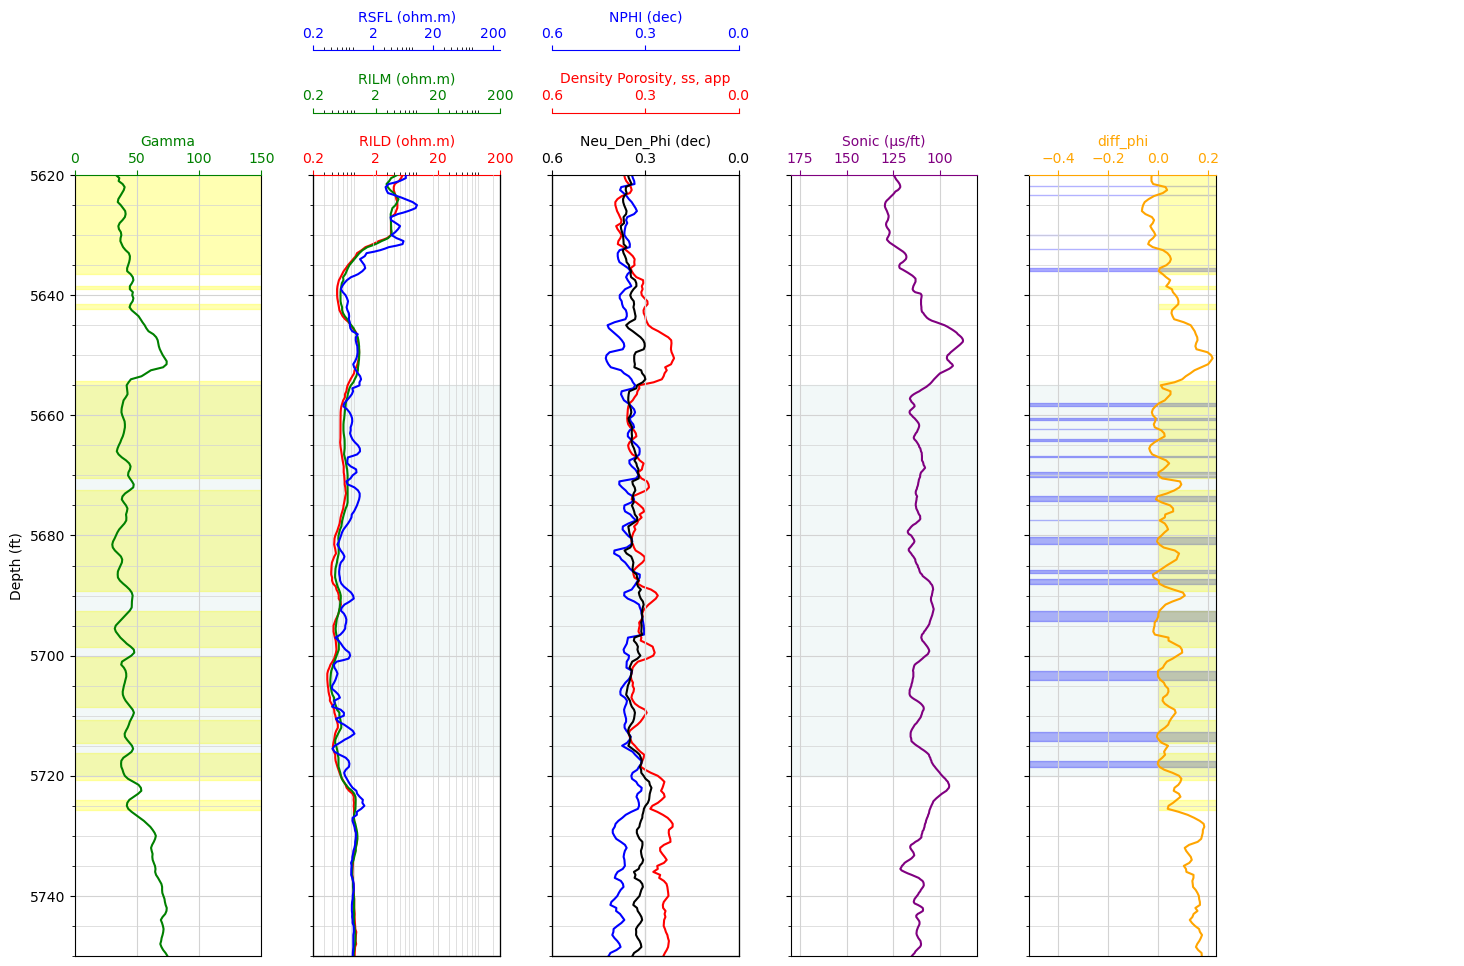

In [558]:
fig, ax = plt.subplots(figsize=(15, 10), sharey=True)
fig.patch.set_visible(False)

plt.axis('off')

# Set up the plot axes
ax1 = plt.subplot2grid((1, 6), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 6), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 6), (0, 2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 6), (0, 3), rowspan=1, colspan=1)
ax5 = ax3.twiny()  # Twins the y-axis for the density track with the neutron track
ax7 = ax3.twiny()  # Create a twinned axis for Neu_Den_Phi
ax6 = plt.subplot2grid((1, 6), (0, 4), rowspan=1, colspan=1)  # New subplot for diff


# Set common y-limits for all subplots
common_ylim = (5620, 5750)

# Gamma Ray track
ax1.plot("GR", "DEPTH", data=df2, color="green")
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (ft)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150])
#ax1.scatter(df2["GR"], df2["DEPTH"], color="black", s=20)  # Add black points
ax1.set_ylim(common_ylim)

# Shade areas where GR < 45
#ax1.fill_betweenx(df2["DEPTH"], df2["diff_phi"].min(), df2["diff_phi"].max(),
#                  where=(df2["diff_phi"].abs() < 0.1), color='blue', alpha=0.3)
ax1.fill_betweenx(df2["DEPTH"], 0, 150, where=(df2["GR"] < 45), color='yellow', alpha=0.3)

# Resistivity track
ax2.plot("RILD", "DEPTH", data=df2, color="red")  # Deep resistivity
ax2.set_xlabel("RILD (ohm.m)")
ax2.set_xlim(0.2, 200)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.semilogx()
ax2.set_ylim(common_ylim)
ax2.grid(which='both', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

ax2_twiny1 = ax2.twiny()
ax2_twiny1.plot("RILM", "DEPTH", data=df2, color="green")  # Medium resistivity
ax2_twiny1.set_xlabel("RILM (ohm.m)")
ax2_twiny1.xaxis.label.set_color("green")
ax2_twiny1.tick_params(axis='x', colors="green")
ax2_twiny1.spines["top"].set_position(("axes", 1.08))
ax2_twiny1.spines["top"].set_edgecolor("green")
ax2_twiny1.semilogx()
ax2_twiny1.set_ylim(common_ylim)

ax2_twiny2 = ax2.twiny()
ax2_twiny2.plot("RSFL", "DEPTH", data=df2, color="blue")  # Spherical resistivity
ax2_twiny2.set_xlabel("RSFL (ohm.m)")
ax2_twiny2.xaxis.label.set_color("blue")
ax2_twiny2.tick_params(axis='x', colors="blue")
ax2_twiny2.spines["top"].set_position(("axes", 1.16))
ax2_twiny2.spines["top"].set_edgecolor("blue")
ax2_twiny2.semilogx()
ax2_twiny2.set_ylim(common_ylim)

# Density Porosity track
ax3.plot("Phi_den_ss", "DEPTH", data=df2, color="red", label='Phi_den_ss')
ax3.set_xlabel("Density Porosity, ss, app")
ax3.set_xlim(.6, 0)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([.6, .3, 0])
ax3.set_ylim(common_ylim)
#ax3.invert_yaxis()


# Sonic track
ax4.plot("DT", "DEPTH", data=df2, color="purple")
ax4.set_xlabel("Sonic (µs/ft)")
ax4.set_xlim(180, 80)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")
ax4.set_ylim(common_ylim)

# Neutron track placed on top of density track
ax5.plot("NPHI_SS", "DEPTH", data=df2, color="blue")
ax5.set_xlabel('NPHI (dec)')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.6, 0)
ax5.set_ylim(common_ylim)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.16))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.6, 0.3, 0])

# NeutronDen Por
ax7.plot("Neu_Den_Phi", "DEPTH", data=df2, color="black")
ax7.set_xlabel('Neu_Den_Phi (dec)')
ax7.xaxis.label.set_color("black")
ax7.set_xlim(0.6, 0)
ax7.set_ylim(common_ylim)
ax7.tick_params(axis='x', colors="black")
ax7.spines["top"].set_visible(True)
ax7.spines["top"].set_edgecolor("black")
ax3.spines["top"].set_position(("axes", 1.08))
ax7.set_xticks([0.6, 0.3, 0])

# Apparent density vs Neutron Porosity (ss) track
ax6.plot("diff_phi", "DEPTH", data=df2, color="orange")
ax6.set_xlabel("diff_phi")
ax6.xaxis.label.set_color("orange")
ax6.set_xlim(df2["diff_phi"].min(), df2["diff_phi"].max())  # Set x-limits based on data
ax6.tick_params(axis='x', colors="orange")
ax6.spines["top"].set_edgecolor("orange")
#ax6.spines["top"].set_position(("axes", 1.16))
#ax6.spines["top"].set_position(("axes", 1.02))
ax6.set_ylim(common_ylim)
ax6.fill_betweenx(df2["DEPTH"], df2["diff_phi"].min(), df2["diff_phi"].max(),
                  where=(df2["diff_phi"].abs() < 0.01), color='blue', alpha=0.3)
ax6.fill_betweenx(df2["DEPTH"], 0, 150, where=(df2["GR"] < 45), color='yellow', alpha=0.3)


# Remove y-axis tick labels for all axes except ax1
for ax in [ax2, ax3, ax4, ax5, ax6,ax7, ax6]:
    ax.set_yticklabels([])

# Common functions for setting up the plot
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    #ax.spines["top"].set_position(("axes", 1.02))
    

# List of all resistivity-related axes
resistivity_axes = [ax2, ax2_twiny1, ax2_twiny2]

# Set specific x-ticks and add gridlines for all resistivity-related axes
for ax in resistivity_axes:
    ax.set_xticks([0.2, 2, 20, 200])
    ax.set_xticklabels([0.2, 2, 20, 200])  # Ensure labels match the ticks
    ax.grid(which='major', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

# List of all axes including twinned axes
all_axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7,ax2_twiny1, ax2_twiny2]


# Invert the y-axis for all axes
for ax in all_axes:
    ax.yaxis.set_minor_locator(MultipleLocator(5)) # y axis gridline spacing decreased to 5 ft
    ax.grid(which='minor', axis='y', color='lightgrey', linestyle='-', linewidth=0.5)
    ax.tick_params(axis='y', which='minor', labelleft=False)  # Hide minor tick labels 
    ax.invert_yaxis()
       
aquifer_color = [ax1, ax2, ax3, ax4, ax6]
for ax in aquifer_color:

    # loop through the formations dictionary and zone colours
    for depth, colour in zip(Aquifer.values(), zone_colours):
        # use the depths and colours to shade across the subplots
        ax.axhspan(depth[0], depth[1], color=colour, alpha=0.05)
        

# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()



Above, we shaded the aquifer in teal, the GR filter in yellow and the Neu-Den- minimal differences in blue, overlying the "cutoff" criteria.

Moreover, the neutron-density porosity is shown alongside the Density Porosity and the Neutron porosity for sandstone matrix, which are both apparent values. The calculated values are between these two curves, as expected from the formula where it is derived from.

In [565]:
# Some statistics on porosity
filtered_df[['Neu_Den_Phi']].describe()

,Neu_Den_Phi
count,39.000000
mean,0.336030
std,0.016979
min,0.309464
25%,0.323045
50%,0.340086
75%,0.345521
max,0.371888


This tells porosities in the aquifer are on average 33%

### 6. From the results of the previous item (i.e., within the aquifer), construct a log-log (log10) cross plot of calculated porosity vs. deep-sensing resistivity. This plot is traditionally referred to as a Pickett plot. Using linear regression, estimate both Rw and Archie’s m exponent

In [567]:
# We focus on the fully saturated interval, and produce a dataframe only with aquifer data
df_aquifer = filtered_df[(filtered_df['DEPTH'] >=5655) & (filtered_df['DEPTH'] <=5720)]
df_aquifer.describe()

,DEPTH,SP,RWA,RSFL,RILM,RILD,DT,GR,CALI,DPHI,NPHI_SS,RHOB,Temp,Phi_den_ss,Rwapp,diff_phi,Neu_Den_Phi
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,5683.221429,-54.379991,0.072801,0.734601,0.551440,0.492180,109.805323,36.407582,1.150003,33.308183,0.332630,2.100415,127.761295,0.333082,0.052089,-0.000452,0.332867
std,18.103945,3.688895,0.020073,0.202302,0.090599,0.081250,4.177530,2.697378,0.005158,1.532283,0.014594,0.025283,0.158515,0.015323,0.011533,0.005559,0.014705
min,5658.000000,-60.157748,0.045168,0.503061,0.449132,0.386652,102.723700,30.166308,1.138861,30.857565,0.307836,2.059071,127.540460,0.308576,0.038540,-0.009906,0.309464
25%,5670.250000,-57.150133,0.054585,0.556783,0.477544,0.434119,105.116850,35.319333,1.148704,31.789059,0.320710,2.082686,127.647719,0.317891,0.042178,-0.004328,0.319683
50%,5681.250000,-54.237425,0.074437,0.698862,0.506505,0.469995,111.079200,37.418131,1.151149,33.844258,0.337764,2.091570,127.744033,0.338443,0.048047,0.000296,0.339182
75%,5690.750000,-51.292918,0.089517,0.841620,0.634610,0.554623,113.588600,38.187596,1.151636,34.382671,0.344639,2.125481,127.827214,0.343827,0.063881,0.004289,0.343928
max,5718.500000,-47.226097,0.111571,1.184441,0.709948,0.651366,114.818100,39.719186,1.158488,35.813905,0.355002,2.140850,128.070188,0.358139,0.071941,0.009140,0.354215


slope 0.08732256983893984
intercept -0.45077506407624984
0.3158955138290783
Rw is 145272.28050963377 ohm.m
1/m is -0.42350682229587133
m equals to 2.361237050630976
intercept -0.6081863667013938
-0.8527880466591097


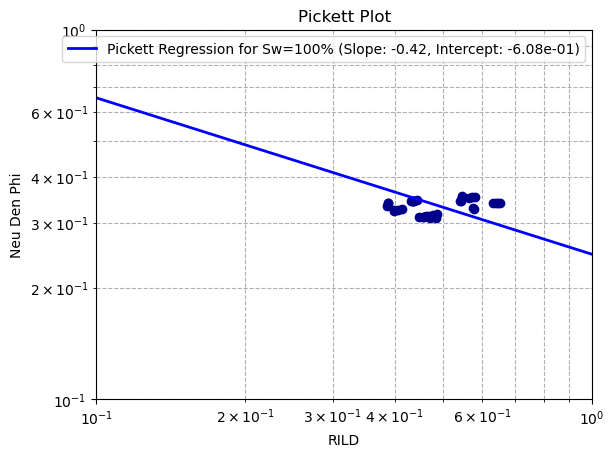

In [589]:
from scipy.stats import linregress

# We create the log-log plot
fig, ax = plt.subplots()
ax.loglog(df_aquifer['RILD'], df_aquifer['Neu_Den_Phi'], 'o', color='DarkBlue')
RILD = np.log10(df_aquifer['RILD'])
NEUDENPHI=np.log10(df_aquifer['Neu_Den_Phi'])

# # We then perform normal linear regression on the log-transformed data
# log_RILD = np.log10(df_aquifer['RILD'])
# log_Neu_Den_Phi = np.log10(df_aquifer['Neu_Den_Phi'])
slope, intercept, r_value, p_value, std_err = linregress(RILD, NEUDENPHI)

print("slope", slope)
print("intercept",intercept)
print(r_value)

# Then we find the Rw as
Rw=10**(-intercept/slope)
print(f'Rw is {Rw} ohm.m')

# Then, we create a new set of data to plot the Sw=1 line
pickett_df = df_aquifer[['RILD','Neu_Den_Phi']].reset_index(drop=True)
# we add the 100% porosity and Rt=Rw point to this dataframe
pickett_df.loc[len(pickett_df)]=[0.061266193925537456, 1]#df.loc[len(df)] = [2, 3, 4]
pickett_df 

SW_RILD=np.log10(pickett_df['RILD'])
SW_NEUDENPHI=np.log10(pickett_df['Neu_Den_Phi'])

slope_pickett, intercept_pickett, r_value2, p_value2, std_err2 = linregress(SW_RILD, SW_NEUDENPHI)
print("1/m is", slope_pickett)
m=-1/slope_pickett
print("m equals to", m)

# Calculate predicted y-values for the pickett_df regression line
x_pickett_extended = np.logspace(np.log10(pickett_df['RILD'].min()) - 1, np.log10(pickett_df['RILD'].max()) + 1, 100)
predicted_y_pickett = 10**(slope_pickett * np.log10(x_pickett_extended) + intercept_pickett)

# Plot the pickett_df regression line
ax.plot(x_pickett_extended, predicted_y_pickett, 'b-', linewidth=2, label=f'Pickett Regression for Sw=100% (Slope: {slope_pickett:.2f}, Intercept: {intercept_pickett:.2e})')
print("intercept",intercept2)
print(r_value2)

# # Customizing the plot
ax.set_xlabel('RILD')
ax.set_ylabel('Neu Den Phi')
ax.set_title('Pickett Plot')

# Set the number of log cycles
ax.set_xlim([10**-1, 10**0])  # x-axis limits
ax.set_ylim([10**-1, 10**0])  # y-axis limits

# Add gridlines
ax.grid(True, which="both", ls="--")

# Add legend
ax.legend()

# Show the plot
plt.show()